In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import glob
import librosa
plt.rcParams.update({'font.size': 18, 'axes.titlesize': 22, 'axes.labelsize': 20, 'xtick.labelsize': 16, 'ytick.labelsize': 16, 'legend.fontsize': 16})

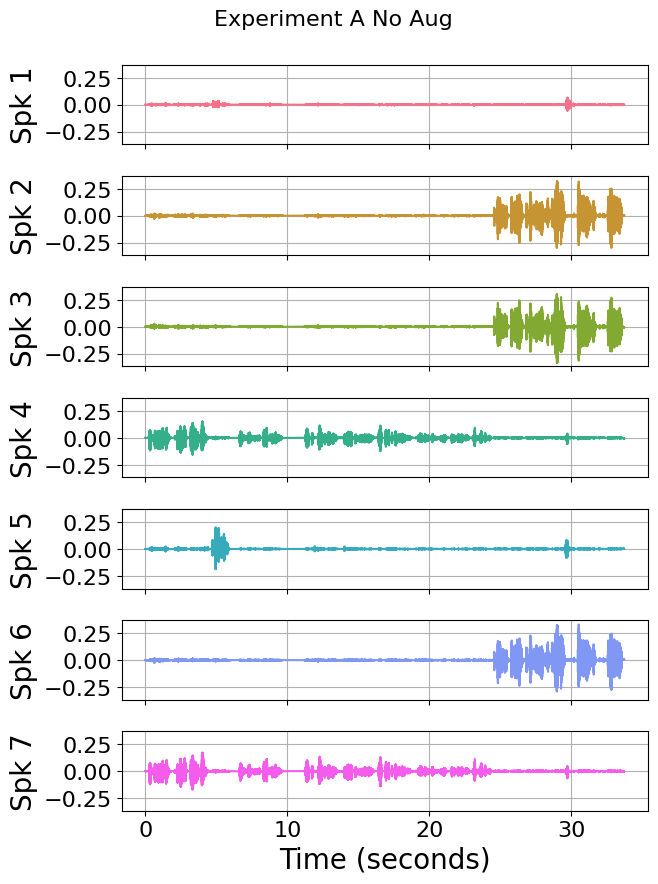

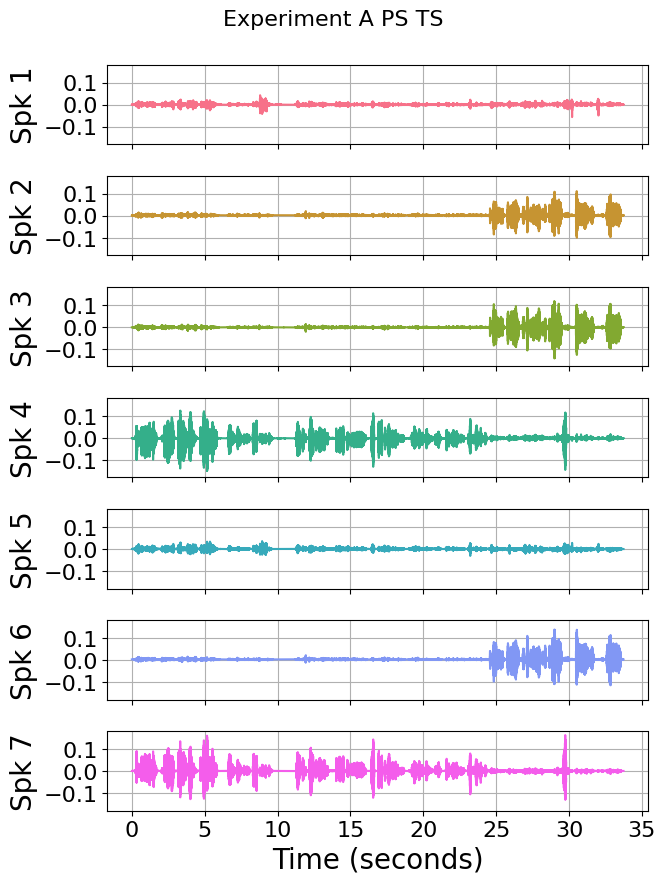

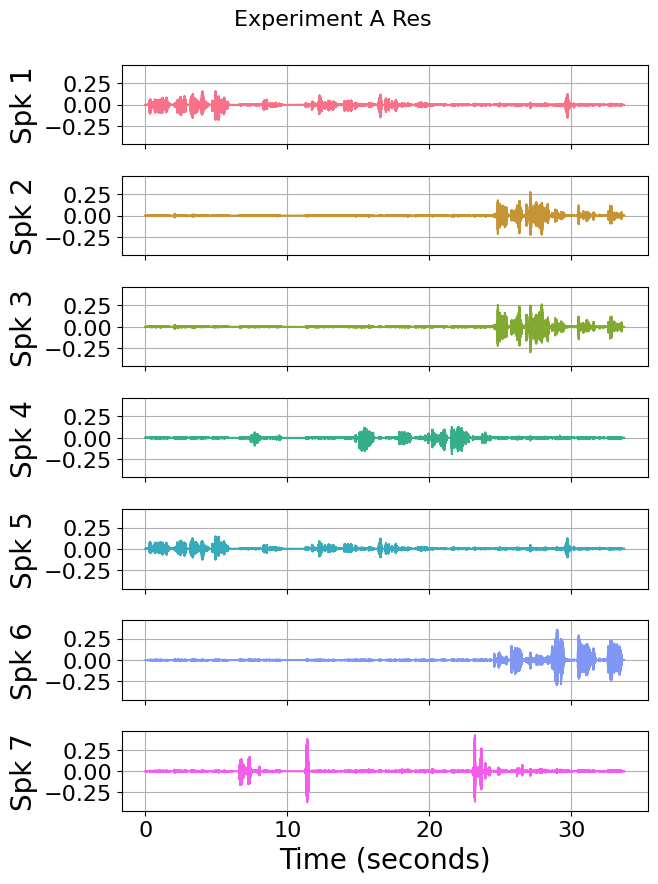

In [7]:
dirs = sorted(glob.glob('separated/Experiment A*/'))

for d in dirs:
    files = sorted(glob.glob(d + 'mixture/*.wav'))
    # create subplots with shared x-axis
    fig, axs = plt.subplots(len(files), 1, figsize=(7, 1.3 * len(files)), sharex=True)
    
    colors = sns.color_palette("husl", len(files))
    for idx, f in enumerate(files):
        # read the wave form
        x, sr = librosa.load(f, sr=None)
        # create time axis in seconds
        t = np.arange(len(x)) / sr
        # plot the wave form with time axis and unique color
        axs[idx].plot(t, x, color=colors[idx])
        axs[idx].set_ylabel(f'Spk {idx+1}')
        # find the maximum absolute amplitude across all signals in this directory
        max_amp = 0
        for f_check in files:
            x_check, _ = librosa.load(f_check, sr=None)
            max_amp = max(max_amp, np.max(np.abs(x_check)))
        ylim = (-1.1 * max_amp, 1.1 * max_amp)
        axs[idx].set_ylim(ylim)
        axs[idx].grid(True)  # add grid to each subplot
    axs[-1].set_xlabel('Time (seconds)')
    plt.suptitle(d.split('/')[1], fontsize=16)
    plt.tight_layout()
    plt.show()

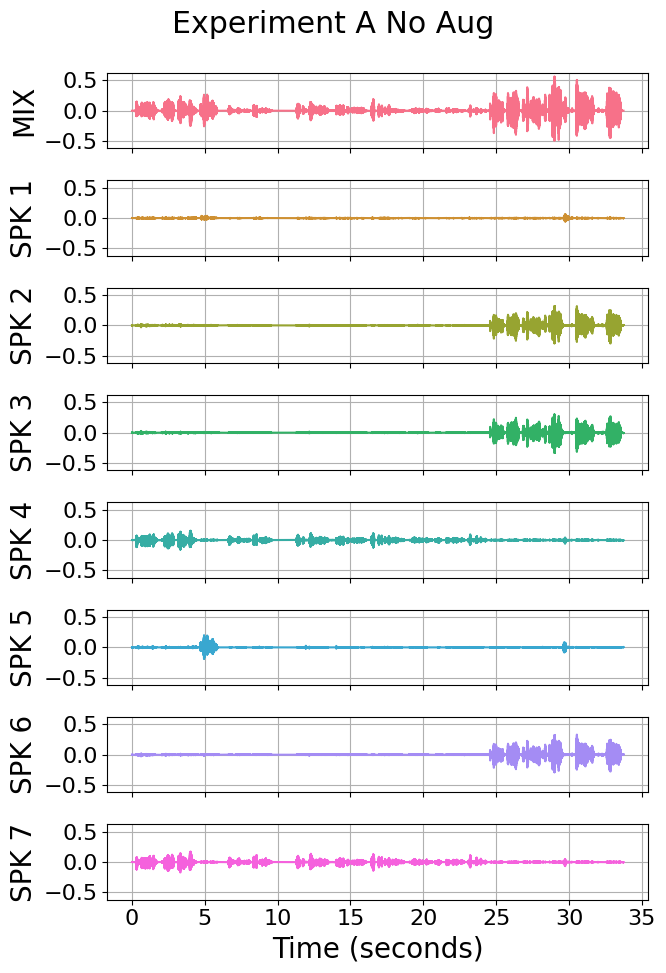

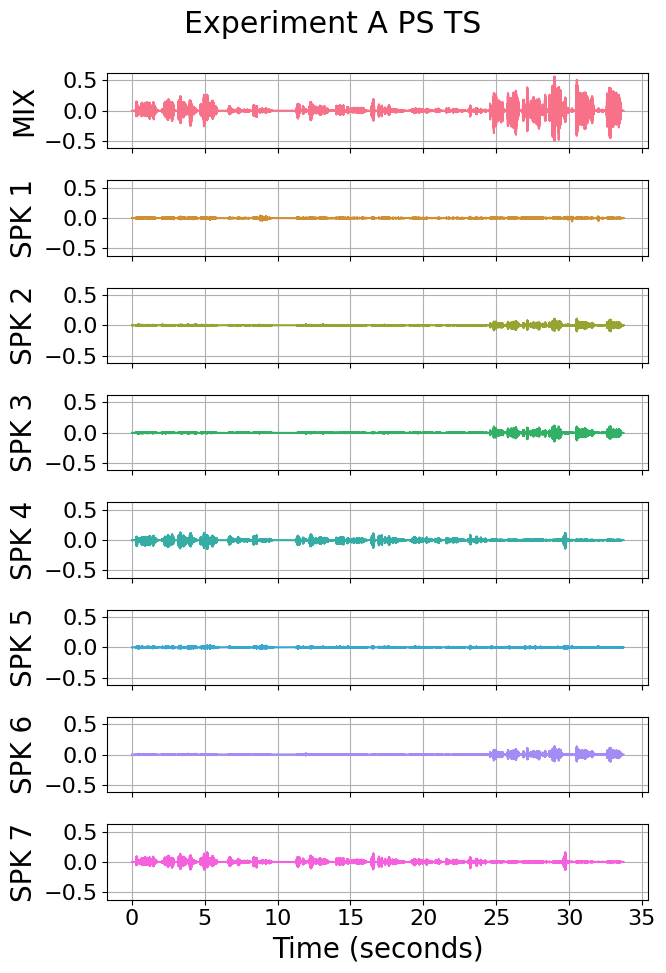

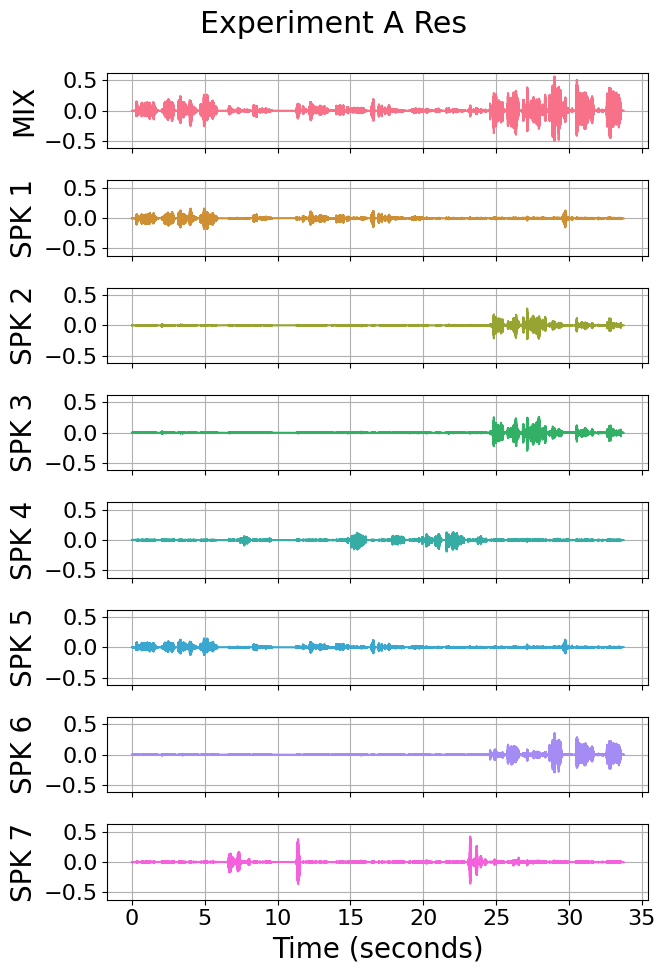

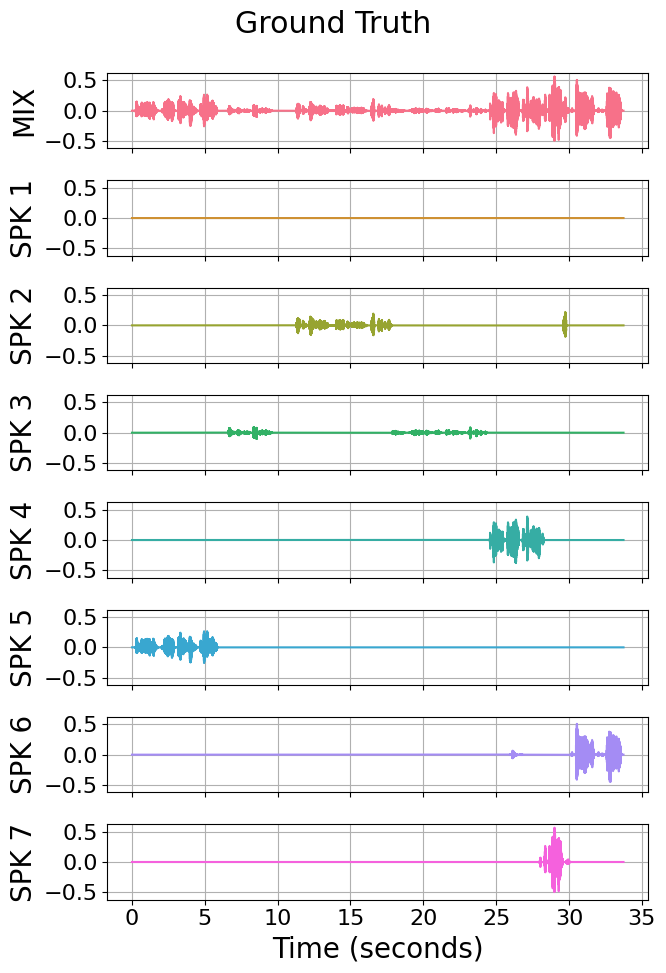

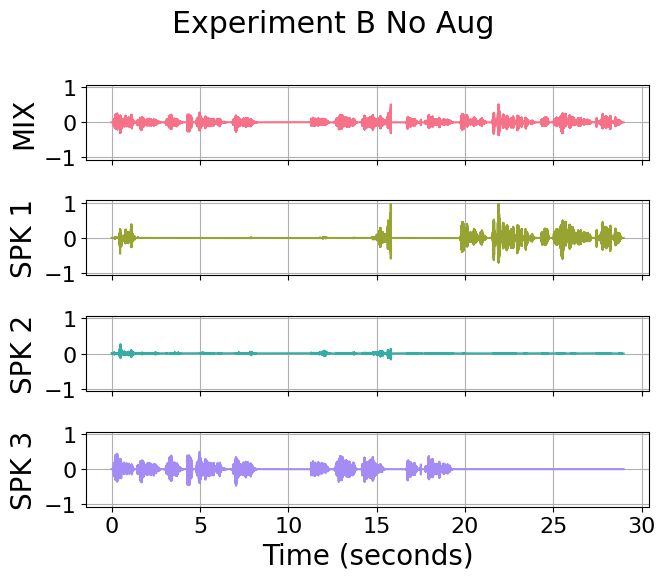

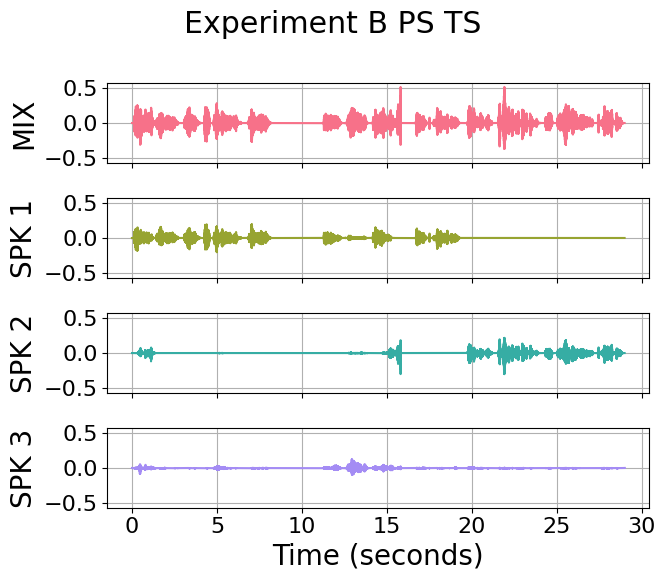

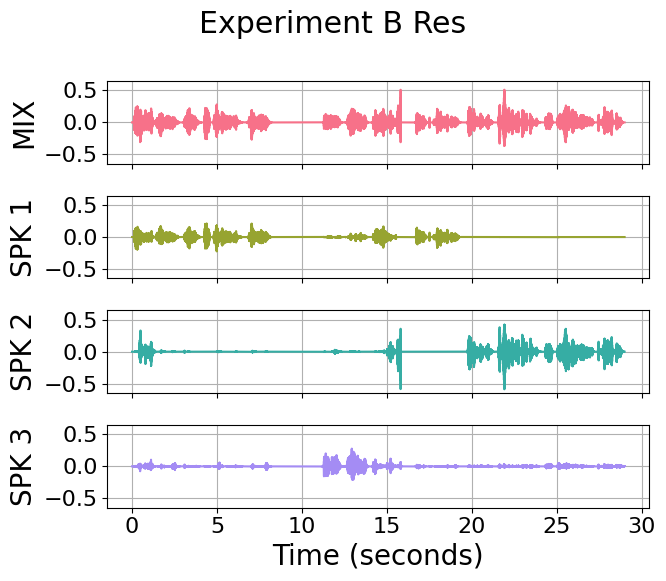

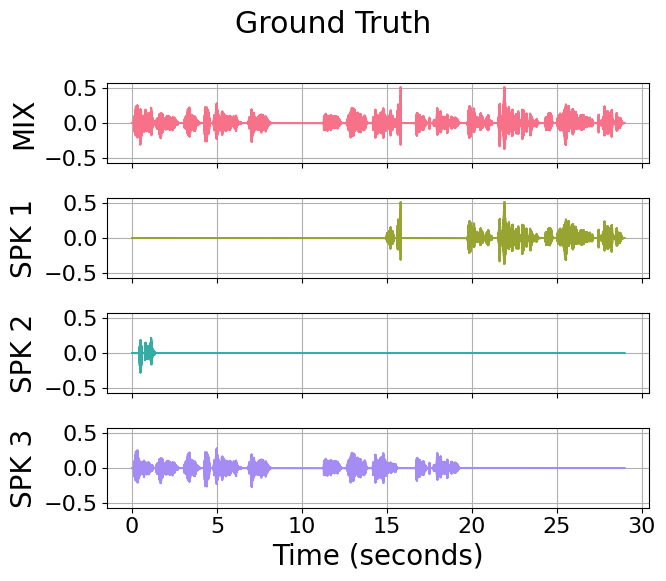

In [14]:
def plot_mixture_waves_separated(directory, reference, mix_path, fig_hight):
    dirs = sorted(glob.glob(directory)) + [reference]

    for d in dirs:
        files = sorted(glob.glob(d + 'mixture/*.wav'))
        
        fig, axs = plt.subplots(len(files) + 1, 1, figsize=(7, fig_hight), sharex=True)
        colors = sns.color_palette("husl", len(files)+1)
        for idx, f in enumerate(mix_path + files):
            x, sr = librosa.load(f, sr=None)
            t = np.arange(len(x)) / sr
            axs[idx].plot(t, x, color=colors[idx])
            axs[idx].set_ylabel(f'SPK {idx}')
            max_amp = 0
            for f_check in mix_path + files:
                x_check, _ = librosa.load(f_check, sr=None)
                max_amp = max(max_amp, np.max(np.abs(x_check)))
            ylim = (-1.1 * max_amp, 1.1 * max_amp)
            axs[idx].set_ylim(ylim)
            axs[idx].grid(True)
            
        axs[0].set_ylabel('MIX')
        axs[-1].set_xlabel('Time (seconds)')
        plt.suptitle(d.split('/')[-2])
        plt.tight_layout()
        plt.show()
    
plot_mixture_waves_separated('separated/Experiment A*/', '/Users/mariapolak/Documents/AAU/Semester_4/convs/7speakers/noaug/test/TESTING10/Ground Truth/', ['/Users/mariapolak/Documents/AAU/Semester_4/convs/7speakers/noaug/test/TESTING10/mixture.wav'], 10)
plot_mixture_waves_separated('separated/Experiment B*/', '/Users/mariapolak/Documents/AAU/Semester_4/no_aug/test/TESTING11/Ground Truth/', ['/Users/mariapolak/Documents/AAU/Semester_4/no_aug/test/TESTING11/mixture.wav'], 6)

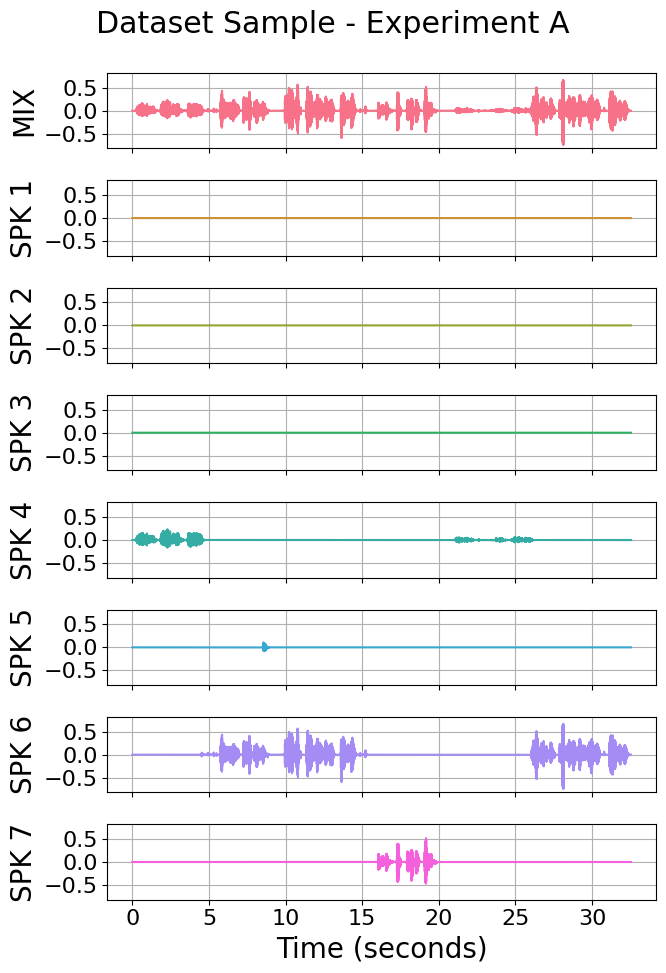

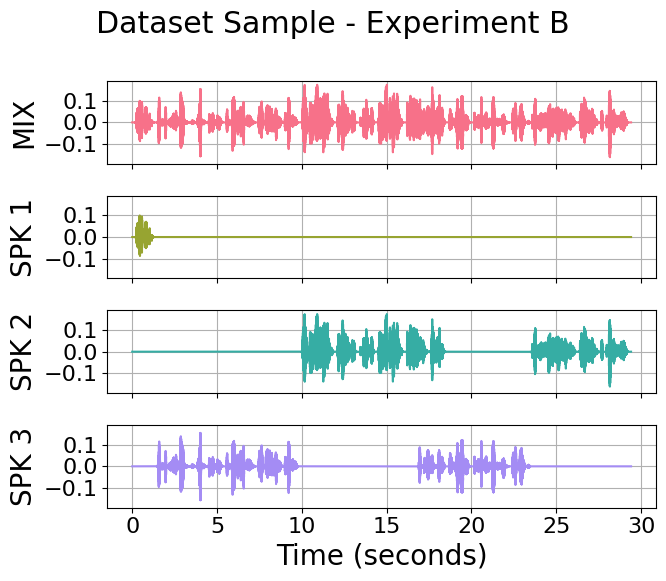

In [10]:
def plot_mixture_waves(directory, fig_hight, title):

    files = sorted(glob.glob(directory + '/*.wav'))
    
    fig, axs = plt.subplots(len(files), 1, figsize=(7, fig_hight), sharex=True)
    colors = sns.color_palette("husl", len(files))
    for idx, f in enumerate(files):
        x, sr = librosa.load(f, sr=None)
        t = np.arange(len(x)) / sr
        axs[idx].plot(t, x, color=colors[idx])
        axs[idx].set_ylabel(f'SPK {idx}')
        max_amp = 0
        for f_check in files:
            x_check, _ = librosa.load(f_check, sr=None)
            max_amp = max(max_amp, np.max(np.abs(x_check)))
        ylim = (-1.1 * max_amp, 1.1 * max_amp)
        axs[idx].set_ylim(ylim)
        axs[idx].grid(True)
        
    axs[0].set_ylabel('MIX')
    axs[-1].set_xlabel('Time (seconds)')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()
    
plot_mixture_waves('/Users/mariapolak/Documents/AAU/Semester_4/convs/7speakers/noaug/train/', 10, "Dataset Sample - Experiment A")
plot_mixture_waves('/Users/mariapolak/Documents/AAU/Semester_4/no_aug/train/TRAINING11/', 6, "Dataset Sample - Experiment B")